Import nessary libraries

In [138]:
import pandas as pd # read data
import numpy as np # excute mathematical operations with large data
import matplotlib.pyplot as plt # visualize the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

Lord the dataset

In [139]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Default 'Date' value is string. using to_datetime to value type as date.

In [140]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [141]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Display stock close value against the time

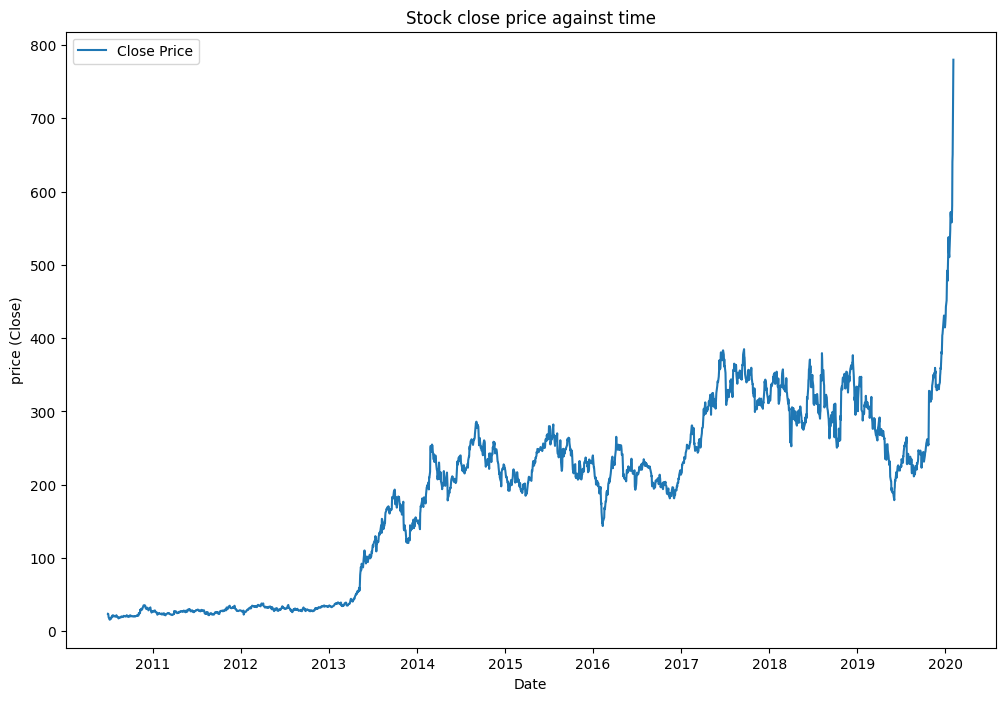

In [142]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label = 'Close Price')
plt.title('Stock close price against time')
plt.xlabel('Date')
plt.ylabel('price (Close)')
plt.legend()
plt.show()

Lag features like this are important in time-series data because stock prices are often dependent on previous values. By including the previous day's closing price as a feature, you're allowing the model to learn patterns based on the most recent information, which can be crucial for stock price prediction.

Why it's useful: Moving averages are commonly used in technical analysis to smooth out short-term fluctuations and identify trends. A 7-day moving average will show the trend of the stock's closing prices over the past week, helping to reduce noise and highlight more significant trends.


Why it's useful: A 30-day moving average helps to smooth out the more volatile short-term fluctuations and provides a longer-term trend of the stock's closing prices. This is especially helpful when analyzing overall market behavior or identifying long-term trends.

In [143]:
# store the previous day's closing price
df['Close_Pre'] = df['Close'].shift(1) 

# calculates the 7-day moving average of the "Close" price and stores it in a new column called "7-day MA".
df['7-day MA'] = df['Close'].rolling(window=7).mean()

df['30-day MA'] = df['Close'].rolling(window=30).mean()

df = df.dropna()

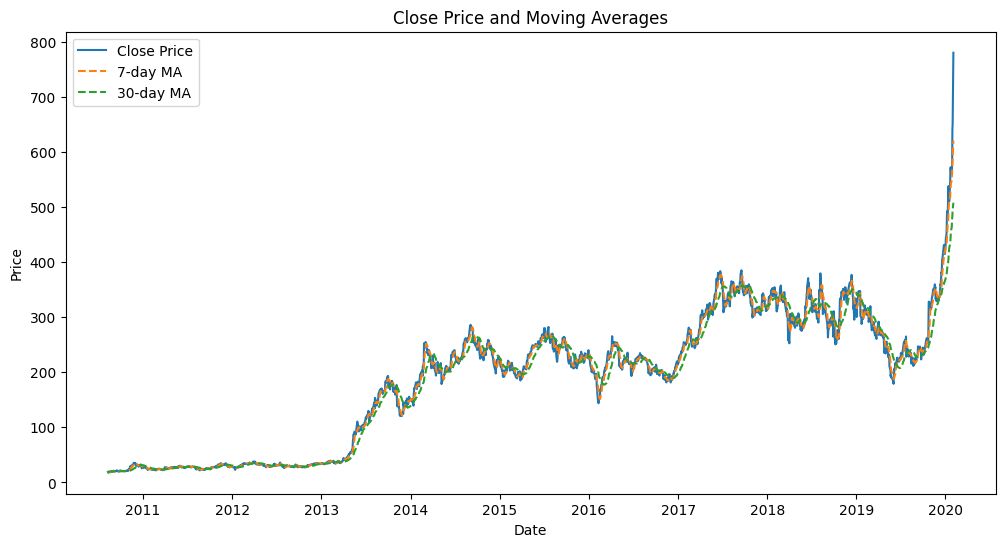

In [144]:
# Plot the features for visualization
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['7-day MA'], label='7-day MA', linestyle='--')
plt.plot(df['30-day MA'], label='30-day MA', linestyle='--')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [145]:
X = df[['Close_Pre', '7-day MA', '30-day MA']]
y = df['Close']

split the data into train and test sets

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Scale the features

In [147]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [149]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 7.548701610065572
Mean Squared Error: 150.77712157544727
Root Mean Squared Error: 12.279133584070468


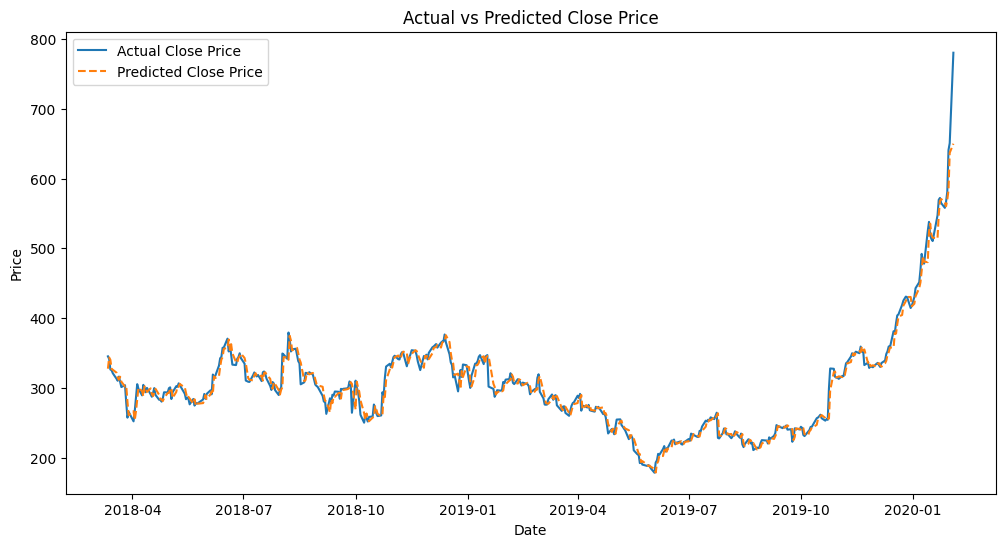

In [150]:
# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Close Price')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', linestyle='--')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()